# SBS

In [1]:
def get_sbs():
 
    base_url = 'https://news.sbs.co.kr/news/newsSection.do'

    params = {
        'sectionType' : '01',
        'plink' : 'SNB',
        'cooper' : 'SBSNEWS',
        'pageIdx' : 1
    }

    index_list = ['01', '02', '03', '07', '08', '14', '09'] # SectionType ( 카테고리를 가져오기 위한 리스트)

    index_str_list = ['정치', '경제', '사회', '국제', '생활&문화', '연예', '스포츠'] # SectionType = 카테고리 이름

    index_point = 0 # 리스트를 가져 오기 위한 index

    txt_file_name = ['a1.txt', 'b1.txt', 'c1.txt', 'd1.txt', 'e1.txt', 'f1.txt', 'g1.txt'] # 각 카테고리별 저장을 위한 text 파일 list


    f = open(txt_file_name[index_point], "w+t") # 무조건 처음 시작할 때 지우고 다시만든다.

    while True:

        resp = requests.get(base_url, params = params)

        soup = BeautifulSoup(resp.text, "lxml")

        news_list_tags = soup.select('#container > div > div.w_news_list.type_issue > ul > li > a.news')



        if(len(news_list_tags) == 0): # 더이상 탐색할 페이지가 없을때

            if(index_point + 1 == 7): # section 및 page 다 탐색 -> 종료

                f.close()
                break

            else:

                f.close()

                index_point += 1

                f = open(txt_file_name[index_point], "w+t")

                params['sectionType'] = index_list[index_point]

                params['pageIdx'] = 1

                continue

            break

        for i in news_list_tags: # 파일을 쓴다.

            dt_tags = i.find_all('strong')
            title_tag = dt_tags[0].text
            f.write(title_tag)
            f.write("\n")



        params['pageIdx'] += 1


    f.close()

# JTBC

In [2]:
def jtbc_news_list(day):
    menu_list = {
        '속보' : 0,
        '정치' : 10,
        '경제' : 20,
        '사회' : 30,
        '국제' : 40,
        '문화' : 50,
        '연예' : 60,
        '스포츠' : 70,
        '날씨': 80
    }
    
    base_url ='http://news.jtbc.joins.com/section/list.aspx?'
    params = {
        'scode' : 0,
        'pdate' : day,
        'pgi' : 0
    }
    
    scode_list = {
        10 : 'a',
        20 : 'b',
        30 : 'c',
        40 : 'd',
        50: 'e',
        60 : 'f',
        70 : 'g',
        80 : 'e'
    }
    
    for k in range(8):
        news_list = []
        params['scode'] +=10
        params['pgi'] = 0
        
        while True:
            params['pgi'] +=1

            resp = requests.get(base_url, params=params)
            soup = BeautifulSoup(resp.text)

            news_tags = soup.find('ul', id='section_list')
            news_list_tags = news_tags.find_all('dt', class_='title_cr')


            if len(news_list_tags)==0:
                break

            for tags in news_list_tags:
                news_title = tags.text

                news_list.append(
                    news_title.strip()
                )
        
    
        name = scode_list[params['scode']]+'2'
        file_name = name + '.txt'
        
        if params['scode'] == 80:
            file1 = open(file_name, 'at')
        else:
            file1 = open(file_name, 'w')
        
        for i in news_list:
            file1.write(i+"\n")
            
        file1.close()

# YTN

In [3]:
# 오늘 날짜 
import re
import datetime

def make_f(newlist):
    # 파일명
    menu_list=['a3.txt','c3.txt','b3.txt',
          'd3.txt','e3.txt','g3.txt']
    for idx, i in enumerate(menu_list):
        f = open(i,'w')
        for j in newlist[idx]:
            msg = j
            f.write(j+"\n")
        f.close()
        #main()    

In [4]:
#스포츠 메뉴의 구조가 달라 따로 구함
def sport(Sports_list, day):
    for i in range(3):
        params={
            'page':i+1,
            's_mcd':'0107'
        }
        resp = requests.get('https://www.ytn.co.kr/photo/photo_list.php',params=params)
        soup = BeautifulSoup(resp.text)
        #리스트
        sec_tag = soup.find("div", id="ytn_list_v2014")
        dl_tag=sec_tag.find_all("dl",class_='photo_list')
        
        for j in dl_tag:
            # 날짜
            date_tag = j.find('dd',class_='date')
            date_d = date_tag.text
            date = date_d.split(" ")
            date = date[0].replace("[","")


            if day == date:
                dt_tag =j.find_all('dt')
                a_tag = dt_tag[0].find("a")
                title = a_tag.text
                
                
                if title in Sports_list:
                    continue
                    
                Sports_list.append(title)
                
      

In [5]:
def get_ytn():
    

    now = datetime.datetime.now()
    day = now.strftime("%Y-%m-%d")
    print(day)



    # YTN사이트
    url = 'https://www.ytn.co.kr/news/news_list_0101.html'

    resp = requests.get(url)
    soup = BeautifulSoup(resp.content)
    menu = soup.find("ul",id='sub_1')
    li_tag = menu.find_all('li',recursive=False)

    a=[]
    politics_list=[]
    economy_list=[]
    social_list=[]
    domestic_list=[]
    International_list=[]
    Science_list=[]
    Sports_list=[]
    culture_list =[]


    # 카테고리마다 뉴스 제목 리스트
    newlist = [politics_list,economy_list,social_list,domestic_list,
               International_list,Science_list,culture_list]


    #3,4,5,6,7,8,9,10,11
    url2 = 'https://www.ytn.co.kr/news/news_list.php?'
    for idx in range(3,11,1):
        #메뉴이동
        a_tag =li_tag[idx].find('a')
        move = a_tag.get('href')
        a = re.findall('\d+',move)

        if idx == 10:
            sport(Sports_list, day)
            newlist.remove(domestic_list)
            newlist.remove(Science_list)
            newlist.append(Sports_list)
            make_f(newlist)
            break


        for i in range(3):
            params={
                'page':i+1,
                's_mcd':a[0]
            }
            resp = requests.get(url2,params=params)
            soup = BeautifulSoup(resp.text)

            #리스트
            sec_tag = soup.find("div", id="ytn_list_v2014")

            span_tag=sec_tag.find_all("dl", class_="news_list_v2014")

            for j in span_tag:
                # 날짜
                date_tag = j.find('dd',class_='date')
                date_d = date_tag.text
                date = date_d.split(" ")
                date = date[0].replace("[","")


                if day == date:
                    dt_tag =j.find_all('dt')
                    a_tag = dt_tag[0].find("a")
                    title = a_tag.text


                    if title in newlist[idx-3]:
                        continue
                    if idx == 6 or idx == 8:
                        newlist[6].append(title)

                    else:    
                        newlist[idx-3].append(title)



# MBN

In [6]:
############################################################
##########프로젝트 MBN 홈페이지 긁어오는 함수 코드##########
############################################################

import requests
import sys
from bs4 import BeautifulSoup
import json


def MBN_News_Function():
    
    count=0
    
    reresult_list=[]
    while count<7:
        
        if count==0:
            category_s='politics'
            MBN_url='https://www.mbn.co.kr/news/politics/'
        
        if count==1:
            category_s='economy'
            MBN_url='https://www.mbn.co.kr/news/economy/'

        elif count==2:
            category_s='society'
            MBN_url='https://www.mbn.co.kr/news/society/'

        elif count==3:
            category_s='world'
            MBN_url='https://www.mbn.co.kr/news/world/'

        elif count==4:
            category_s='culture'
            MBN_url='https://www.mbn.co.kr/news/culture/'

        elif count==5:
            category_s='entertain'
            MBN_url='https://www.mbn.co.kr/news/entertain/'        

        elif count==6:
            category_s='sports'
            MBN_url='https://www.mbn.co.kr/news/sports/'

        result_list=[]
        for i in range(1,4): #페이지번호
            params={
                'page':i,
                'vod':None,
                'category':category_s
            }
            resp=requests.get(MBN_url, params=params)

            resp.encoding='eur-kr'
            soup=BeautifulSoup(resp.text, "lxml")

            MBN_news_list=soup.select('div.list_area > dl.article_list > dt.tit > a')
            MBN_news_list_date=soup.select('div.list_area > dl.article_list > dd.desc > span.date')

            news_list=[]
            for news,date in zip(MBN_news_list, MBN_news_list_date):

                news=news.text.strip() #제목 내 띄어쓰기 제거
                news=news.replace("\'" , " ") #제목 내 따옴표 제거
                news=news.replace("♥" , " ") #제목 내 따옴표 제거
                news=news.replace("[포토]"," ") #제목 내 [포토] 제거

                date=date.text[0:10].replace("-","")

                if date == '20200805': #날짜 수정하면 됨
                    news_list.append(news)
            result_list.extend(news_list)
        
        count+=1
        
        
        reresult_list.append(result_list)
    return reresult_list





############################################################
#########프로젝트 MBN 메모장으로 꺼내오는 함수 코드#########
############################################################

# a1, 2, 3, 4 -> 정치
# b1, 2, 3, 4 -> 경제
# c1, 2, 3, 4 -> 사회
# d1, 2, 3, 4 -> 국제
# e1, 2, 3, 4 -> 생활&문화, 문화 + mbn생활건강 +ytn전국,과학
# f1, 2, 3, 4 -> 연예
# g1, 2, 3, 4 -> 스포츠

def MBN():

    title_list=['a','b','c','d','e','f','g']
    #나중에 j를 e로 바꿔서 추가해야함!

    f_list=[]
    for title in title_list:
        f=open('{}4.txt'.format(title),'w')    
        f_list.append(f)


    MBN=MBN_News_Function()   # 2중리스트로 옴. [[1,2,3...] , [1,2,3...] , [1,2,3...]]


    for i, f in zip(MBN,f_list):
        for j in i:
            f.write(j)
            f.write('\n')
        f.close()

# 메인

2020-08-05
---------------
---------------
---------------
---------------
---------------
---------------
---------------
 지역            	17
 통합            	15
 청년            	10
 윤석열           	10
 재난            	10
 선포            	10
 국회            	9
 검토            	9
 뉴스            	9
 민주당           	8
 특별            	8
 의원            	8
 원피스           	7
 대통령           	7
 피해            	7
 개발            	7
 레이더           	7
 수위            	7
 김진애           	7
 부동산           	7
 여당            	7
 호정            	6
 총리            	6
 건의            	6
 신속            	6
 필승            	6
 정치            	6
 논란            	5
 공개            	5
 무기            	5
 경기            	5
 대동강           	5
 폭발            	5
 세금            	5
 정부            	5
 대책            	5
 경보            	5
 발언            	5
 정경두           	4
 초음속           	4
 미사일           	4
 기대            	4
 설훈            	4
 이제            	4
 내일            	4
 한국인           	4
 반발            	4
 윤희            	4
 정책    

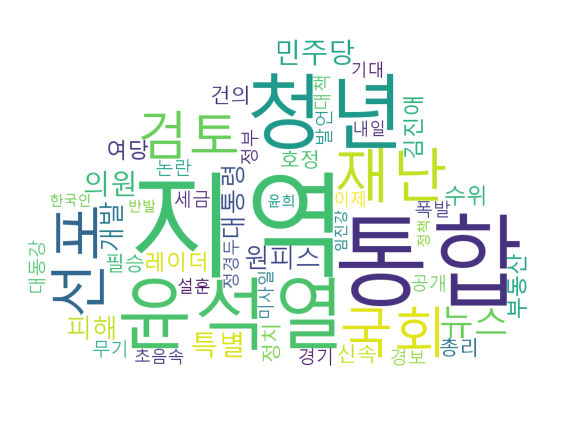

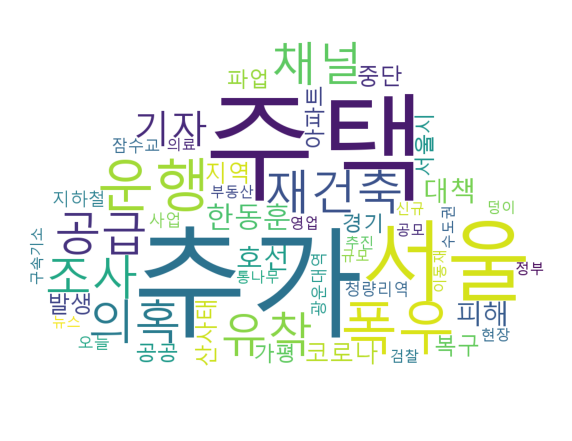

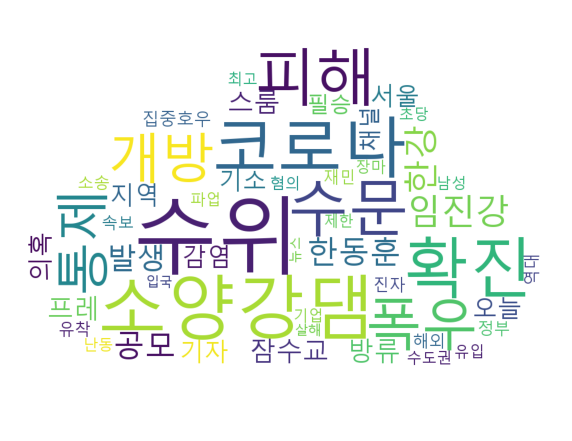

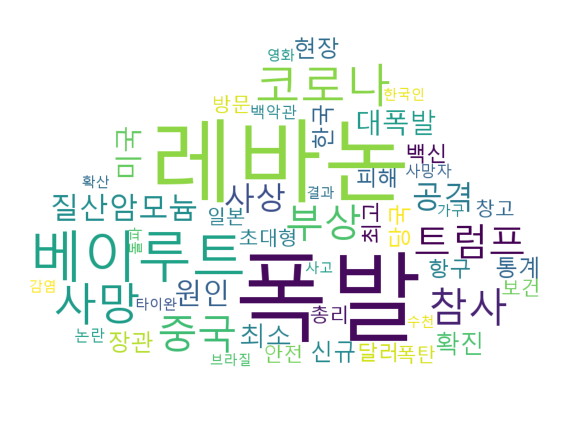

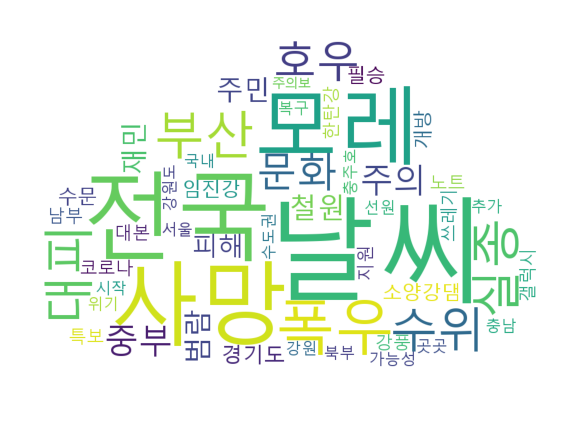

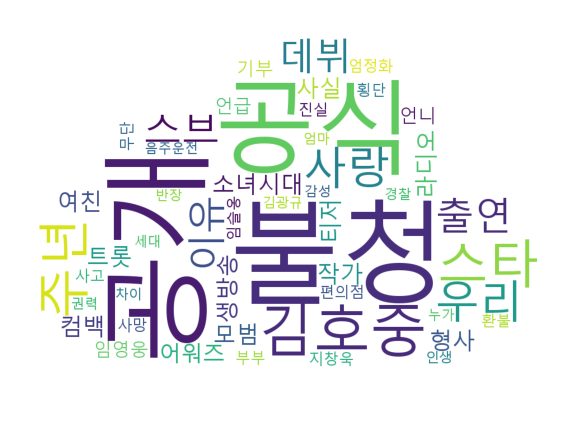

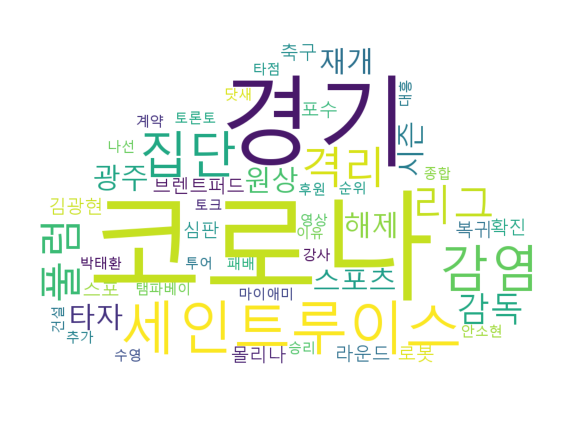

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from collections import Counter
import numpy as np
import matplotlib
from IPython.display import set_matplotlib_formats
from PIL import Image



get_sbs()
jtbc_news_list(20200805)
get_ytn()
MBN()

################################# 텍스트에 Data 저장된 상태

txt_save_list = ['a.txt', 'b.txt', 'c.txt', 'd.txt', 'e.txt', 'f.txt', 'g.txt']

txt_file_list = [
    'a1.txt', 'a2.txt', 'a3.txt', 'a4.txt', 
    'b1.txt', 'b2.txt', 'b3.txt', 'b4.txt', 
    'c1.txt', 'c2.txt', 'c3.txt', 'c4.txt',  
    'd1.txt', 'd2.txt', 'd3.txt', 'd4.txt', 
    'e1.txt', 'e2.txt', 'e3.txt', 'e4.txt', 
    'f1.txt', 'f2.txt', 'f3.txt', 'f4.txt',
    'g1.txt', 'g2.txt', 'g3.txt', 'g4.txt'
]

#txt_file_list = [ 'a1.txt', 'a2.txt', 'a3.txt', 'b1.txt', 'b2.txt', 'b3.txt', 'c1.txt', 'c2.txt', 'c3.txt']



category_index_point = 0


while category_index_point < 7: # 카테고리 탐색
    
    
    s = [] #sbs
    d = [] #jtbc
    e = [] #ytn
    g = [] #mbn

    f = open(txt_file_list[category_index_point * 4] , 'r') # 0, 4 , 8 , 12
    s = f.read()
    f.close()
    
    f = open(txt_file_list[(category_index_point*4) + 1] , 'r') #1, 5, 9, 13
    d = f.read()
    f.close()
    
    if((category_index_point * 4) + 2) == 22:
        pass
    else:
        f = open(txt_file_list[(category_index_point*4) + 2] , 'r') #2, 6, 10, 14
        e = f.read()
        f.close()
    
    f = open(txt_file_list[(category_index_point*4) + 3] , 'r') #3 7 11 15
    g = f.read()
    f.close()
    
    print('-' * 15)
    
    if((category_index_point * 4) + 2) == 22:
        s = s + d + g
    else:
        s = s + d + e + g
    
    
    f = open(txt_save_list[category_index_point], 'w+t')
    f.write(s)
    
    category_index_point += 1 # 다음 카테고리
    
category_index_point = 0

while category_index_point < 7:
    
    f = open(txt_save_list[category_index_point], 'r')
    lines = f.read()

    nlpy = Twitter()
    nouns = nlpy.nouns(lines)
    count = Counter(nouns)

    tag_count = []
    tags = []

    for n, c in count.most_common(100):
        dics = {'tag' : n, 'count' : c}
        if len(dics['tag']) >= 2 and len(tags) <= 49:
            tag_count.append(dics)
            tags.append(dics['tag'])
            
    
    new_tag = []
    
    
    for tag in tag_count:
        print(" {:<14}".format(tag['tag']), end='\t')
        print("{}".format(tag['count']))
        
    new_list = []
    
    for tag in tag_count:
        a = tag['tag']
        b = tag['count']
        c = (a, b)
        new_list.append(c)
        
        
    alice_mask = np.array(Image.open("KakaoTalk_20200805_164139637.png"))
    font_path = 'C:/Windows/Fonts/malgun.ttf';
    wc = WordCloud(font_path = font_path, background_color = 'white', 
        width=800, height=600, mask = alice_mask)
    cloud = wc.generate_from_frequencies(dict(new_list))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    
    category_index_point += 1
    
    print('\n' * 10)



    
    